# Plotting Fun With Matlotlib (and some Seaborn assistance)
> Numerous times I've found myself in a situation where data is not yet in a datawarehouse or available in a visualization tool (such as Looker), but charts have been expected for scheduled reports

- toc: false
- branch: master
- badges: true
- categories: [viz, jupyter]
- hide: true
- search_exclude: false

Numerous times I've found myself in a situation where data is not yet in a datawarehouse or available in a visualization tool (such as Looker), but nonetheless charts were expected for scheduled reports. This is a gallery of some of the charts I've made. It's important to note that [Chris Moffit's](https://twitter.com/chris1610) post on [Effectively Using Matplotlib](https://pbpython.com/effective-matplotlib.html) was instrumental to finally grokking how to interact with that charting library.

In [4]:
%matplotlib inline
import numpy as np
from numpy.random import randn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context("talk")

np.random.seed(12345)

## Create Some Fake Data
Most of the charts I deal with in Marketing Analytics / Business Operations have been based on timeseries data. In prepping for this post, I found simulating timeseries, especially the patterns I see frequently in marketing analytics, not as straightforward. Luckily a few different people on Twitter were helpful, especially this suggestion from [Shahar Shani-Kadmiel](https://twitter.com/shaharkadmiel):

> twitter: https://twitter.com/shaharkadmiel/status/1257598824056569856

In [185]:
# set the time range
time = pd.date_range(
    start = '2018-01-01',
    end = '2019-12-31',
    freq = 'D'
)

# leverage sine waves to create daily data with weekly patterns and a trend that shows growth over time
amp = 1000
freq = 52 / 365
data = amp * np.sin(freq * 2 * np.pi * np.arange(time.size))
noise = 2 * np.random.rand(time.size) - 1
data += 0.2 * data.ptp() * noise
trend = np.power(np.arange(time.size),1.25)
data += trend
data += 50000
data = np.around(data,decimals=0).astype(int)

In [195]:
def generate_series(time,amp,freq,power,vertical_shift):
    data = amp * np.sin(freq * 2 * np.pi * np.arange(time.size))
    noise = 2 * np.random.rand(time.size) - 1
    data += 0.2 * data.ptp() * noise
    trend = np.power(np.arange(time.size),power)
    data += trend
    data += vertical_shift
    data = np.around(data,decimals=0).astype(int)
    return data

In [196]:
date_range = pd.date_range(start = '2018-01-01', end = '2019-12-31',freq = 'D')

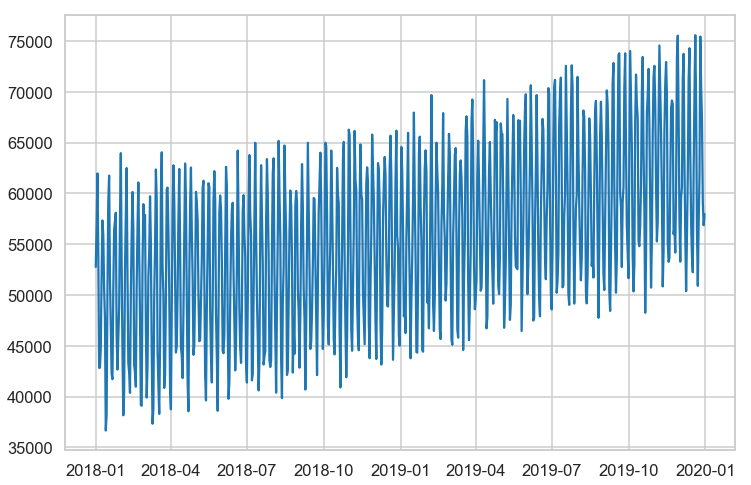

In [198]:
web_traffic = generate_series(date_range,10000,(52 / 365),1.45,50000)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(date_range,web_traffic)

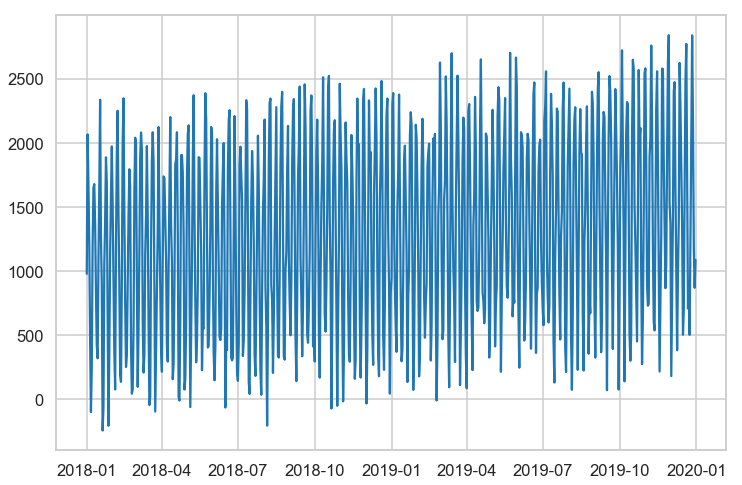

In [202]:
acct_create = generate_series(date_range,1000,(52 / 365),0.95,1000)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(date_range,acct_create)

In [209]:
traffic = pd.DataFrame(web_traffic,index=time,columns=['website_traffic'])
traffic.index.name = 'date'

In [210]:
accts = pd.DataFrame(acct_create,index=time,columns=['accounts_created'])
accts.index.name = 'date'

In [216]:
df = pd.concat([traffic,accts],axis=1)
df = df.reset_index()
df.head()

date  website_traffic  accounts_created
0 2018-01-01            52765               976
1 2018-01-02            56745              2065
2 2018-01-03            61969              1675
3 2018-01-04            54372              1212
4 2018-01-05            42823               474

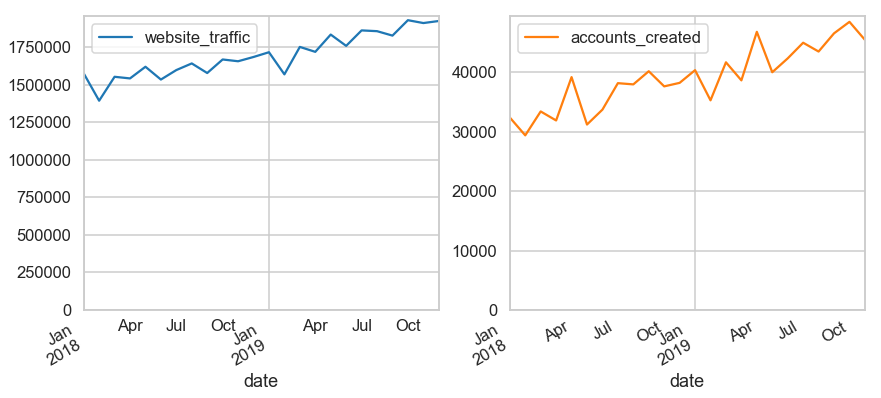

In [230]:
df.groupby(pd.Grouper(key='date',freq='MS')).sum().plot(subplots=True, layout=(1,2), figsize=(14, 6), sharey=False, ylim = 0);

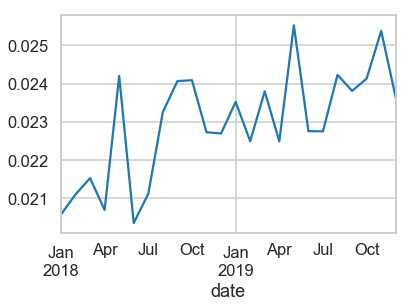

In [226]:
df.groupby(pd.Grouper(key='date',freq='MS')).sum().assign(signup_rate = lambda x: x['accounts_created'] / x['website_traffic']).loc[:,'signup_rate'].plot()